**Como primer paso se normaliza el campo con que se va trabajar.**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Se normaliza el campo de Edad y Sexo y se obtiene un nuevo archivo llamado: archivo_normalizado.csv**

In [33]:
"""
    Algoritmo para normalizar las columnas de edad y sexo.

    Parametros:
       file_path: recibe la ruta del archivo a normalizar.
"""

file_path = "archivo_organizado.csv"

# Cargar el archivo con el separador correcto
df = pd.read_csv(file_path, encoding="latin1", sep=";", low_memory=False)

# Verificar si la columna "Edad" y "Sexo" existen
if "Edad" in df.columns and "Sexo" in df.columns:

    # Función para normalizar la edad
    def normalizar_edad(edad):
        if edad <= 20:
            return 1
        elif 21 <= edad <= 40:
            return 2
        else:
            return 3

    # Normalizar la columna "Edad"
    df["Edad_Normalizada"] = df["Edad"].apply(normalizar_edad)

    # Normalizar la columna "Sexo"
    df["Sexo_Normalizado"] = df["Sexo"].map({'M': 0, 'F': 1})  # M = 0, F = 1

    # Guardar el archivo con las nuevas columnas
    df.to_csv("archivo_normalizado.csv", index=False, sep=";")

    print("Normalización completada, archivo guardado como 'archivo_normalizado.csv'.")
else:
    print("Las columnas 'Edad' y/o 'Sexo' no se encontraron en el archivo.")

Normalización completada, archivo guardado como 'archivo_normalizado.csv'.


In [34]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100, centroids = None):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [35]:
def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Capturando los datos del archivo normalizado, se ajusto para ingresar por paramentros la cantidad de registro a tomar para poder obtimizar el recurso y obtener una repuesta mas rapido que si tomada todo el millo de datos

In [56]:
def generar_matriz_2d(file_path, n_samples=1000):

    """
    Genera una matriz 2D tomando una cantidad específica de muestras del archivo.

    Parametros:
        file_path (str): Ruta del archivo CSV.
        n_samples (int): Cantidad de muestras a leer del archivo.

    Retorna:
        matriz_2d (numpy.ndarray): Matriz 2D generada con Edad_Normalizada y Sexo.
    """

    # Cargar solo las primeras 'n_samples' filas del archivo
    df = pd.read_csv(file_path, encoding="latin1", sep=";", low_memory=False, nrows=n_samples)

    # Verificar que las columnas "Edad_Normalizada" y "Sexo" existen
    if "Edad_Normalizada" in df.columns and "Sexo" in df.columns:

        # Convertir la columna "Sexo" a valores numéricos (M=0, F=1)
        df['Sexo_Num'] = df['Sexo'].map({'M': 0, 'F': 1})

        # Obtener los valores de Edad_Normalizada y Sexo_Num
        edad_normalizada = df["Edad_Normalizada"].values
        sexo_num = df["Sexo_Num"].values

        # Crear la matriz 2D
        matriz_2d = np.column_stack((edad_normalizada, sexo_num))

        # Mostrar la matriz generada
        print(matriz_2d)

        return matriz_2d
    else:
        print("Las columnas 'Edad_Normalizada' y/o 'Sexo' no se encontraron en el archivo.")
        return None

**Generar el grafico en 2D con los datos obtenidos del archivo normalizado**

[[3 1]
 [3 1]
 [3 1]
 ...
 [2 0]
 [2 0]
 [2 0]]
[1 1 1 ... 0 0 0]
[[1.85261194 0.45149254]
 [3.         0.46443966]
 [0.         0.        ]]


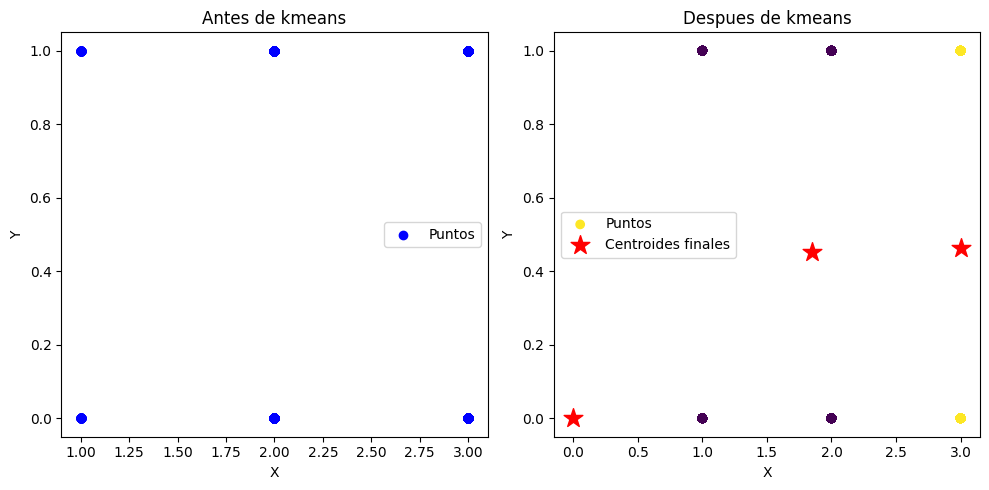

In [57]:
file_path = "archivo_normalizado.csv"  # Ruta del archivo
n_samples = 2000  #cantidad de registro a tomar del archivo
matriz_2d = generar_matriz_2d(file_path, n_samples)

points = matriz_2d
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)
dibujar2D(points, kmeans.centroids, labels)